# **Этап 1. Подбор данных:**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mgk717
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering


100%|██████████| 4.36k/4.36k [00:00<00:00, 3.89MB/s]

In [ ]:
import pandas as pd


f = ('/content/wine-dataset-for-clustering/wine-clustering.csv')
data = pd.read_csv(f)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data = data.drop_duplicates()
data.fillna(data.mean(), inplace=True)

In [ ]:
# воспользуемся функциями isnull() и sum()
data.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [ ]:
# Удаление строк с любыми пропущенными значениями
data = data.dropna()
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# **Этап 2. Реализация алгоритмов кластеризации**

# 2.1 Алгоритм K-means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
kmeans_labels = kmeans.fit_predict(normalized_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 2.2 Иерархическая кластеризация

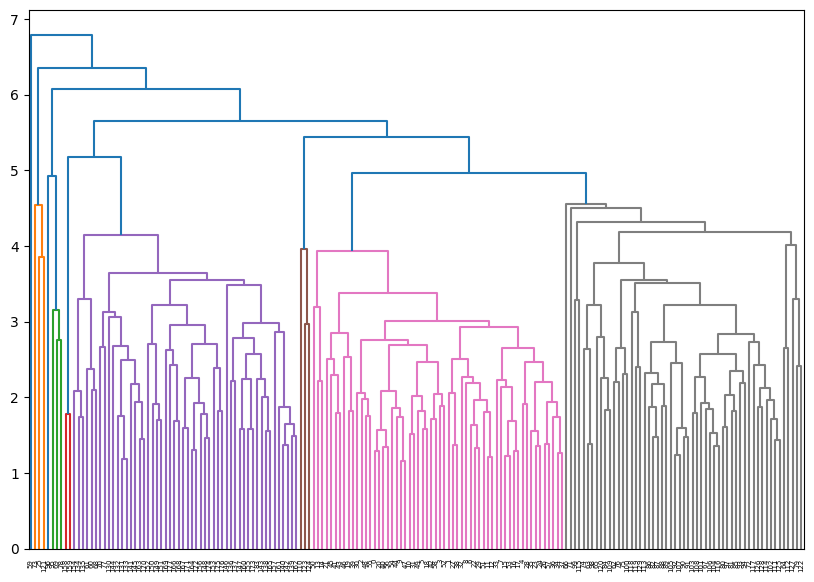

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Z = linkage(normalized_data, method='average')
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(normalized_data)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# 2.3 Алгоритм DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_data)
dbscan.fit(normalized_data)
labels = dbscan.labels_

# **Этап 3. Определение количества кластеров:**

# 3.1 Метод локтя

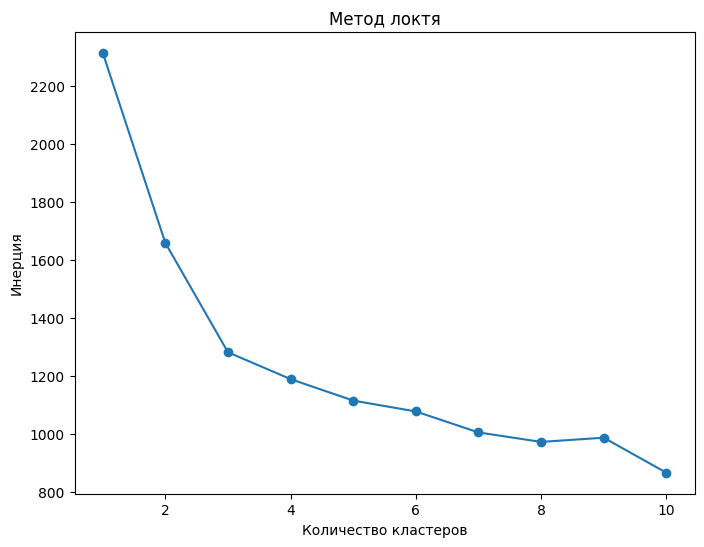

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# 3.2 Коэффициент силуэта

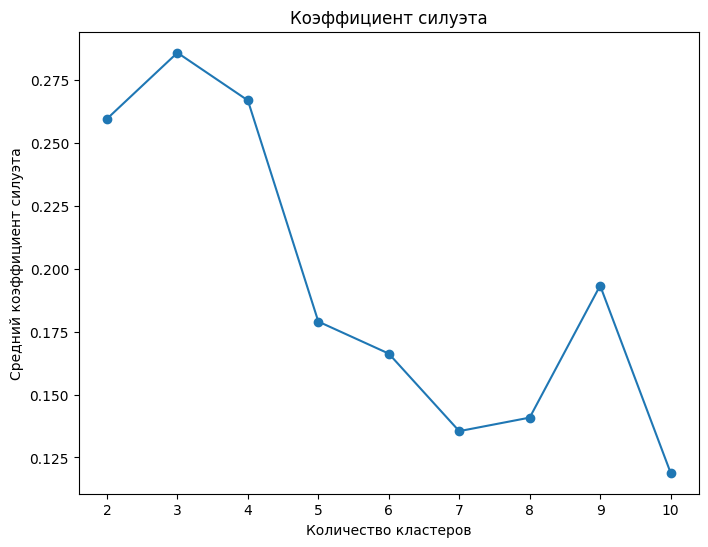

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(normalized_data, labels))
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.show()

# **Этап 4. Визуализация иерархической кластеризации:**

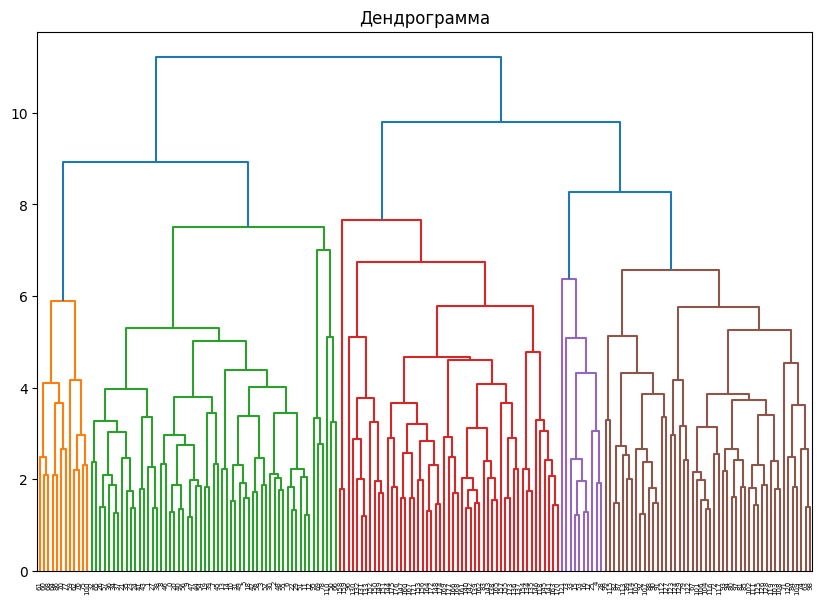

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(normalized_data, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма')
plt.show()

# **Этап 5. Построение графиков:**

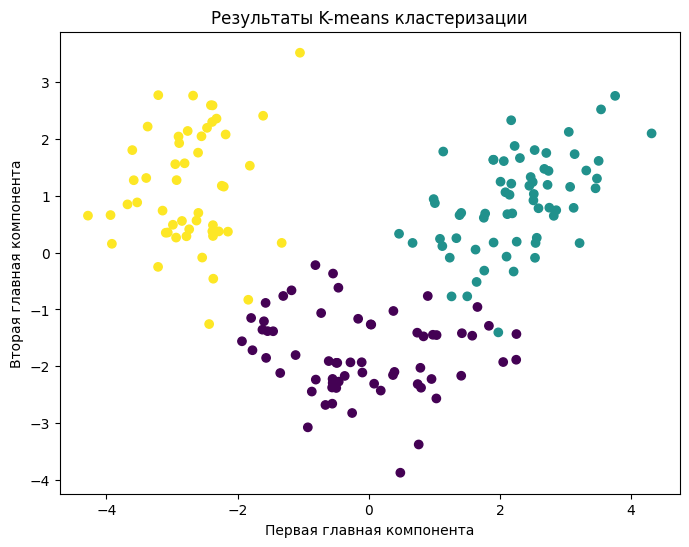

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
labels = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Результаты K-means кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

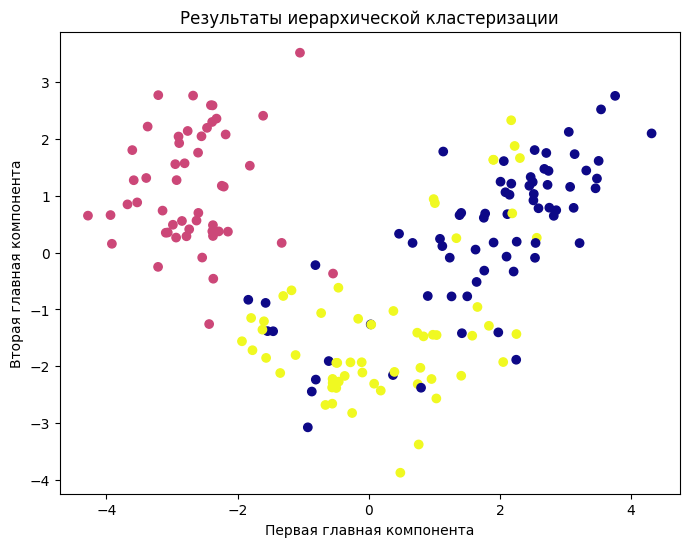

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='plasma', marker='o')
plt.title('Результаты иерархической кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

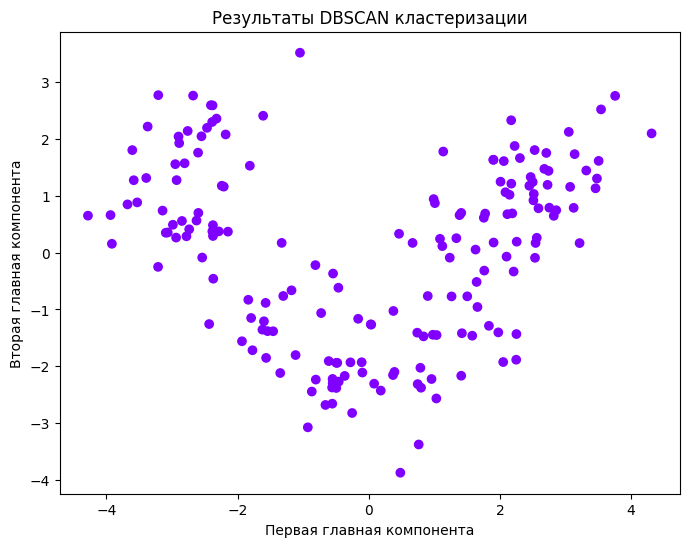

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(normalized_data)
labels = dbscan.labels_
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow', marker='o')
plt.title('Результаты DBSCAN кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

# **Этап 6. Сравнение результатов:**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
import numpy as np


# Для K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(normalized_data, kmeans_labels)

# Для иерархической кластеризации
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(Z, 3, criterion='maxclust')
hierarchical_silhouette = silhouette_score(normalized_data, hierarchical_labels)

# Для DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(normalized_data)
dbscan_labels = dbscan.labels_

if len(np.unique(dbscan_labels[dbscan_labels != -1])) > 1:  # Исключаем шумовые точки
    dbscan_silhouette = silhouette_score(normalized_data, dbscan_labels)
else:
    dbscan_silhouette = None
    print("DBSCAN: недостаточно уникальных меток для расчета силуэта.")


# Вывод средних коэффициентов силуэта для каждого алгоритма
print(f"K-means silhouette: {kmeans_silhouette}")
print(f"Hierarchical silhouette: {hierarchical_silhouette}")
print(f"DBSCAN silhouette: {dbscan_silhouette}")

DBSCAN: недостаточно уникальных меток для расчета силуэта.
K-means silhouette: 0.2848589191898987
Hierarchical silhouette: 0.20378689690677748
DBSCAN silhouette: None


In [ ]:
dbscan_1 = DBSCAN(eps=0.3, min_samples=5)
dbscan_1.fit(normalized_data)
dbscan_labels_1 = dbscan_1.labels_

# Проверка меток для первого DBSCAN
if len(np.unique(dbscan_labels_1[dbscan_labels_1 != -1])) > 1:  # Исключаем шумовые точки
    dbscan_silhouette_1 = silhouette_score(normalized_data, dbscan_labels_1)
else:
    dbscan_silhouette_1 = None
    print("DBSCAN с eps=0.3: недостаточно уникальных меток для расчета силуэта.")

dbscan_2 = DBSCAN(eps=0.7, min_samples=5)
dbscan_2.fit(normalized_data)
dbscan_labels_2 = dbscan_2.labels_

# Проверка меток для второго DBSCAN
if len(np.unique(dbscan_labels_2[dbscan_labels_2 != -1])) > 1:  # Исключаем шумовые точки
    dbscan_silhouette_2 = silhouette_score(data, dbscan_labels_2)
else:
    dbscan_silhouette_2 = None
    print("DBSCAN с eps=0.7: недостаточно уникальных меток для расчета силуэта.")

print(f"Silhouette for DBSCAN with eps=0.3: {dbscan_silhouette_1}")
print(f"Silhouette for DBSCAN with eps=0.7: {dbscan_silhouette_2}")

DBSCAN с eps=0.3: недостаточно уникальных меток для расчета силуэта.
DBSCAN с eps=0.7: недостаточно уникальных меток для расчета силуэта.
Silhouette for DBSCAN with eps=0.3: None
Silhouette for DBSCAN with eps=0.7: None
